# Finishing Touches

This notebook shows how to apply various finishing touches to charts to help them look better.

This notebook uses the “MovieLens + IMDB/RottenTomatoes” data from the [HETREC data](https://grouplens.org/datasets/hetrec-2011/).  It also uses data sets built in to Seaborn.

The code in this notebook will make extensive use of the [matplotlib pyplot API](https://matplotlib.org/api/pyplot_api.html) directly, often using it to extend Seaborn-generated plots.

I will add to this notebook as more questions come up in class.

## Setup

First we will import our modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then import the HETREC MovieLens data.  A few notes:

- Tab-separated data
- Not UTF-8 - latin-1 encoding seems to work
- Missing data encoded as `\N` (there's a good chance that what we have is a PostgreSQL data dump!)

### Movies

In [2]:
movies = pd.read_csv('hetrec2011-ml/movies.dat', delimiter='\t', encoding='latin1', na_values=['\\N'])
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

It's useful to index movies by ID, so let's just do that now.

In [4]:
movies = movies.set_index('id')

### Movie Info

In [5]:
movie_genres = pd.read_csv('hetrec2011-ml/movie_genres.dat', delimiter='\t', encoding='latin1')
movie_genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [6]:
movie_tags = pd.read_csv('hetrec2011-ml/movie_tags.dat', delimiter='\t', encoding='latin1')
movie_tags.head()

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1


In [7]:
tags = pd.read_csv('hetrec2011-ml/tags.dat', delimiter='\t', encoding='latin1')
tags.head()

,id,value
0,1,earth
1,2,police
2,3,boxing
3,4,painter
4,5,whale


### Ratings

In [8]:
ratings = pd.read_csv('hetrec2011-ml/user_ratedmovies-timestamps.dat', delimiter='\t', encoding='latin1')
ratings.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


We're going to compute movie statistics too:

In [9]:
movie_stats = ratings.groupby('movieID')['rating'].agg(['count', 'mean']).rename(columns={
    'mean': 'MeanRating',
    'count': 'RatingCount'
})
movie_stats.head()

,RatingCount,MeanRating
movieID,,
1,1263,3.735154
2,765,2.976471
3,252,2.873016
4,45,2.577778
5,225,2.753333


### Seaborn data

We'll also use the Titanic data set from Seaborn:

In [10]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


And the Tips data:

In [11]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Labels and Titles

The first thing we want to do is to make sure our chart is *well-labeled*.  Seaborn has pretty good defaults — it uses the column names, when possible — but our column names don't always fully explain what we want to do.

For example, let's use our basic bar chart:

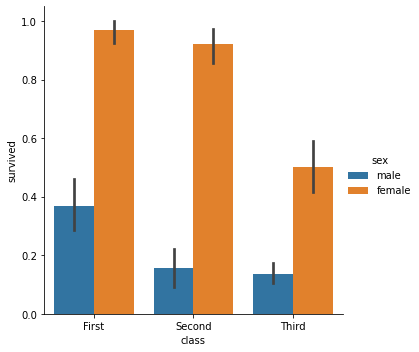

In [12]:
sns.catplot('class', 'survived', hue='sex', data=titanic, kind='bar')

The *y* axis label on this chart isn't very informative — what does “survived” mean as a numeric variable?  We can relable the *y* axis with the `ylabel` function:

Text(30.160833333333343, 0.5, 'Survival Rate')

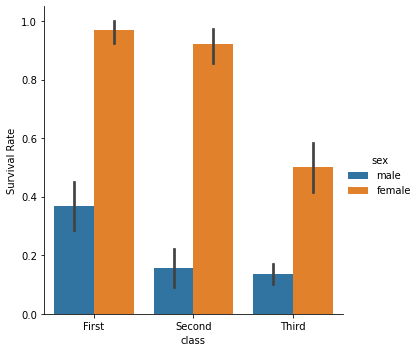

In [13]:
sns.catplot('class', 'survived', hue='sex', data=titanic, kind='bar')
plt.ylabel('Survival Rate')

We can also clean up the *x* axis just a bit, and give the chart a title:

Text(0.5, 1.0, 'Titanic Passenger Survival Rates')

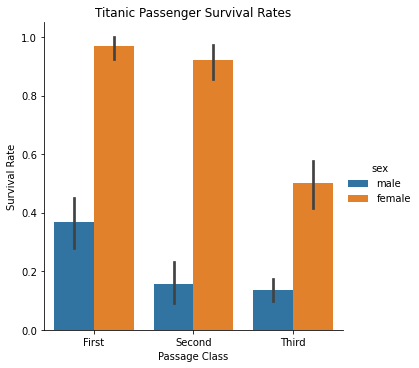

In [14]:
sns.catplot('class', 'survived', hue='sex', data=titanic, kind='bar')
plt.ylabel('Survival Rate')
plt.xlabel('Passage Class')
plt.title('Titanic Passenger Survival Rates')

## Reference Lines

Remember our scatter plot of the `tips` data?

Text(0, 0.5, 'Tip')

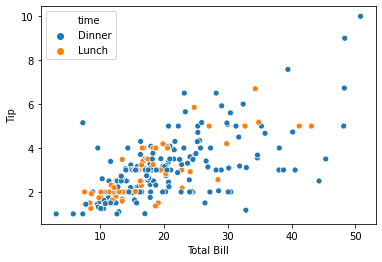

In [15]:
sns.scatterplot('total_bill', 'tip', hue='time', data=tips)
plt.xlabel("Total Bill")
plt.ylabel("Tip")

What if we want to easily see how actual tips related to 20% of the bill? 20% would be represented by a line passing through $(0,0)$ with a slope of $0.2$.  The latest matplotlib version has a function to do this automatically, but it hasn't made its way to Anaconda yet, so we'll need to get a little manual.

What we need to do is make a *line plot* of a bunch of bill values - say from 0 to some reasonable upper bound - and each value multipled by 0.2.  Matplotlib is a pretty low-level interface.  The `numpy.linspace` function lets us generate a bunch of `x` values:

In [16]:
tip20_xs = np.linspace(0, 55, 100)

Which we can multiply by 20%:

In [17]:
tip20_ys = tip20_xs * 0.2

We can plot a line:

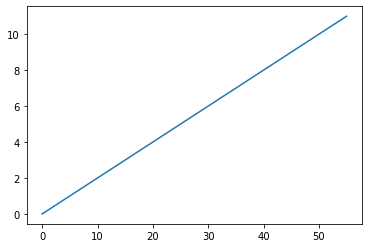

In [18]:
plt.plot(tip20_xs, tip20_ys)

OK, that's good! It matches one of the colors that Seaborn will use; no worries, we can change the color.

We're going to draw our line first, so it is *behind* the Seaborn dots.  Let's give it a try:

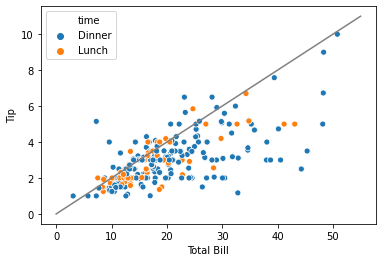

In [19]:
plt.plot(tip20_xs, tip20_ys, color='grey')
sns.scatterplot('total_bill', 'tip', hue='time', data=tips)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

Let's also change the markers used for the two times.  This will make it easier to read the plot on e.g. a black-and-white printer.  In Seaborn, we can do this with `style`.

 Also, maybe we don't like the colors - let's change palettes.

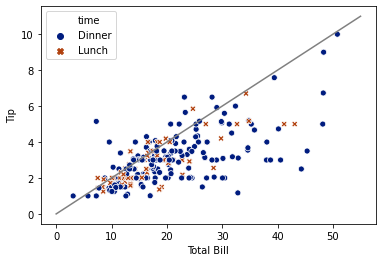

In [20]:
plt.plot(tip20_xs, tip20_ys, color='grey')
sns.scatterplot('total_bill', 'tip', hue='time', style='time', data=tips, palette='dark')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In Matplotlib, the parameters for colors and styles have different names.

## Controlling Size

All these plots are using a default size and aspect ratio.  What if we want to change that?

The `figure` call will reconfigure matplotlib for the duration of drawing the figure (until `plt.show()` is called):

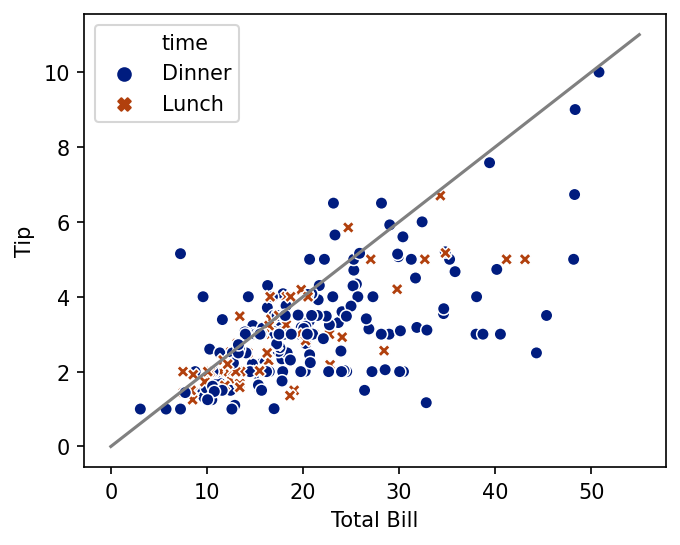

In [21]:
fig = plt.figure(figsize=(5, 4), dpi=150)
plt.plot(tip20_xs, tip20_ys, color='grey')
sns.scatterplot('total_bill', 'tip', hue='time', style='time', data=tips, palette='dark')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

Some Seaborn functions are *figure-level*.  Such functions set up the Matplotlib figure themselves, but provide a way to control its size through the *height* and *aspect* options.  `height` sets the height of the figure, and `aspect` the multiplier used to compute the width.

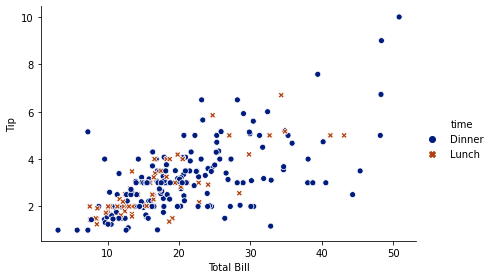

In [22]:
sns.relplot('total_bill', 'tip', hue='time', style='time', data=tips, palette='dark', height=4, aspect=1.5)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In *Concluding Remarks*, I say more about what “figure-level” means.

## Saving to Disk

We can save a chart to a file with `savefig`:

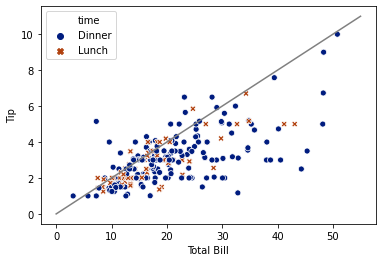

In [23]:
plt.plot(tip20_xs, tip20_ys, color='grey')
sns.scatterplot('total_bill', 'tip', hue='time', style='time', data=tips, palette='dark')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.savefig('tips.png')

That creates a file `tips.png` with the image; let's load it with an HTML `img` tag into our document:

![Tip Figure](tips.png)

You can also save images to `.pdf` files, which is very useful for writing papers in LaTeX. The resulting figure will be entirely vector-based, so it will look good at any zoom level in your final PDF.  For PNG figures used in e.g. Word, I recommend also passing `dpi=300` to `savefig`, to render them at high resolution so they look good.  I haven't found a good vector format that is supported by Matplotlib and embeddable in Word.

If you have a figure with a very large number of points (e.g. a scaatter plot with thousands to millions of points), the resulting PDF will render *each* point, which will make your document very slow to render and may crash some printers.  In such cases, high-DPI (at least 300) PNG is also a good option for LaTeX.

Don't use JPEG.  It will introduce visual artifacts into your figures.

## Concluding Remarks

Seaborn is basically a set of convenience APIs on top of matplotlib (and statsmodels).  It is great for relatively standard chart types, and makes things like faceting far easier than core matplotlib makes them.  However, since all it does is call matplotlib in a relatively straightforward fashion, you can (for the most part) freely interchange seaborn and matplotlib calls.

Some Seaborn functions are "figure-level".  Matplotlib has concepts of *figures* and *axes*; basically an `Axes` is one plot with *x* and *y* axes.  A figure can have multiple axes on it (called *subplots*).  Figure-level functions will take over the Matplotlib figure/axes structure, so they can do things like faceting.  When a figure-level function creates multiple axes, touching up the plots with direct matplotlib calls is a little more difficult.  Other Seaborn functions can actually be given the `Axes` to draw themselves on, in case you are managing figures and axes yourself.

A detailed discussion of matplotlib's API design and capabilities is beyond the scope of this course.
We'll be seeing more examples (and this notebook will be expanded) as the course progresses, and I encourage you to look at the galleries and tutorials provided by seaborn and matplotlib for inspiration and instructions on more sophisticated plots.

[plotnine](https://plotnine.readthedocs.io/en/stable/gallery.html) makes assembling nuanced, polished charts quite a bit easier, abstracting over matplotlib's capabilities with a uniform API called the *Grammar of Graphics* (pioneered by the R package ggplot2), but it is currently harder to install in Anaconda.  I want our notebooks for this class to run out of the box in Anaconda when possible, in order to minimize software difficulties.